<a href="https://colab.research.google.com/github/helenross636/magic_season/blob/main/%23Task15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
import time

In [2]:
# Устанавливаем seed для повторяемости результатов
np.random.seed(42)
# Загружаем данные
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Преобразование размерности изображений
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
# Нормализация данных
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Преобразуем метки в категории
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
#random.seed(42)
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/models/seed(42)/model1.h5')
model2 = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/models/seed(42)/model2.h5')
model3 = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/models/seed(42)/model3.h5')
model4 = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/models/seed(42)/model4.h5')

In [4]:
models = []
models.append(model)
models.append(model2)
models.append(model3)
models.append(model4)

In [13]:
w1500 = (models[1].layers[3].kernel)
print(w1500.shape)
w5000 = (models[2].layers[3].kernel)
print(w5000.shape)

w_PLUS = np.vstack((w1500,w5000))
print('Конкатенация: ',w_PLUS.shape)

(1500, 10)
(5000, 10)
Конкатенация:  (6500, 10)


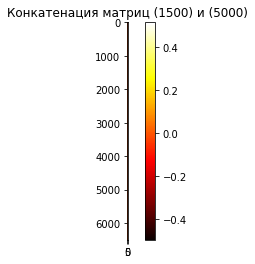

In [12]:
plt.figure()
plt.title('Конкатенация матриц (1500) и (5000)')
plt.imshow(w_PLUS, cmap='hot')
plt.colorbar()  


### Получить те элементы матрицы A[0:5000] (модель 5000), которые соответствуют элементам A[5000:] (модель 1500) по метрике корелляции больше 0.9.


In [17]:
(y,z) = w_PLUS.shape
am = np.zeros((y,y))
am = abs(np.corrcoef(w_PLUS[0:5000],w_PLUS[5000:]))
np.fill_diagonal(am, 0)

mask = am > 0.9

similar = {} #представляют тип данных словаря dict, а словарь состоит из групп значений пар ключей
for idx, k in enumerate(mask):
  nk = k.nonzero()[0]
  if len(nk) != 0:
    similar[idx] = nk[np.argmax(am[idx,nk])]

print("> 0.9")
print(len(similar))


> 0.9
6006


In [18]:
similar

{0: 6110,
 1: 537,
 2: 3832,
 3: 3505,
 4: 3125,
 5: 2831,
 6: 4316,
 7: 2414,
 8: 5067,
 9: 6218,
 10: 4136,
 11: 2935,
 12: 4244,
 13: 4280,
 14: 2919,
 15: 3758,
 17: 4308,
 18: 5117,
 19: 440,
 20: 2654,
 21: 6421,
 22: 2530,
 23: 1821,
 24: 5113,
 25: 5133,
 27: 5033,
 28: 2790,
 29: 2967,
 31: 3274,
 32: 2691,
 34: 5601,
 35: 3161,
 36: 5452,
 37: 2419,
 38: 111,
 39: 5285,
 40: 1072,
 41: 5265,
 42: 5834,
 43: 3419,
 44: 3711,
 45: 5824,
 46: 6,
 47: 3440,
 48: 6258,
 49: 6425,
 50: 4843,
 51: 630,
 52: 1164,
 53: 812,
 54: 5290,
 55: 705,
 56: 4121,
 57: 3795,
 58: 4399,
 59: 1738,
 60: 5700,
 61: 3592,
 62: 6253,
 63: 6139,
 64: 2020,
 65: 2693,
 66: 218,
 68: 4780,
 69: 3163,
 70: 1661,
 71: 1774,
 72: 6402,
 73: 3451,
 74: 1848,
 75: 3009,
 76: 4895,
 77: 6489,
 78: 2707,
 79: 702,
 80: 220,
 81: 3518,
 82: 1786,
 83: 4985,
 84: 2637,
 85: 2801,
 86: 819,
 87: 4862,
 88: 5873,
 89: 5300,
 90: 4245,
 91: 2408,
 92: 4468,
 93: 1415,
 94: 1857,
 95: 3634,
 96: 4236,
 99: 4339,
